In [5]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
import wandb


In [44]:
# 读取数据
df = pd.read_csv("E:\竞赛\服创赛-A08\data\A08.csv")

# 处理缺失值
df = df.dropna()

# 处理类别不平衡
smote = SMOTE(k_neighbors=5)
X_train, X_val, y_train, y_val = train_test_split(df.drop('RES', axis=1), df['RES'], test_size=0.25, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



In [31]:
X_train.shape,y_val.shape

((22302, 81), (3912,))

In [29]:
print('类别 0 样本数量:', y_train[y_train == 0].shape[0])
print('类别 1 样本数量:', y_train[y_train == 1].shape[0])


类别 0 样本数量: 11151
类别 1 样本数量: 11151


In [30]:
print('类别 1 样本数量:', y_val[y_val == 1].shape[0])

类别 1 样本数量: 183


- n_estimators: 训练过程中的树的数量。

- learning_rate: 学习率，控制每次迭代更新模型的程度。

- max_depth: 树的最大深度。

- gamma: 用于控制树的复杂度。

- subsample: 在训练每个树时使用的样本比例。

- colsample_bytree: 在训练每个树时使用的特征比例。

- objective: 损失函数，这里使用的是二分类逻辑回归。

- eval_metric: 评估指标，这里使用的是 AUC。

- use_label_encoder: 是否使用标签编码器将类别特征转换为数字

In [22]:
# 初始化模型
model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)


In [23]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
# 预测
y_pred = model.predict(X_val)

# 绘制 ROC 曲线并计算 AUC 分数
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc_score = auc(fpr, tpr)

# 输出 AUC 分数和类别报告
print(f"AUC 分数: {auc_score}")
print(classification_report(y_val, y_pred))


AUC 分数: 0.6920789206441317
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3729
           1       0.57      0.40      0.47       183

    accuracy                           0.96      3912
   macro avg       0.77      0.69      0.72      3912
weighted avg       0.95      0.96      0.95      3912



排名 1: 交易时间YYYYMM_NN (0.17962001264095306)
排名 2: 就诊的月数 (0.12175728380680084)
排名 3: 非账户支付金额_SUM (0.08244073390960693)
排名 4: 月药品金额_MAX (0.060450561344623566)
排名 5: 医疗救助医院申请_SUM (0.04484741762280464)
排名 6: 月统筹金额_MAX (0.04062693938612938)
排名 7: 贵重药品发生金额_SUM (0.03713270649313927)
排名 8: 一天去两家医院的天数 (0.03521934151649475)
排名 9: 月就诊次数_MAX (0.029220711439847946)
排名 10: 其它发生金额_SUM (0.021886982023715973)
排名 11: 医疗救助个人按比例负担金额_SUM (0.018860014155507088)
排名 12: 个人编码 (0.014285575598478317)
排名 13: 个人账户金额_SUM (0.013769678771495819)
排名 14: 贵重检查费金额_SUM (0.012887297198176384)
排名 15: 月就诊次数_AVG (0.011325653642416)
排名 16: 月就诊医院数_AVG (0.01091164443641901)
排名 17: 是否挂号 (0.010652758181095123)
排名 18: 顺序号_NN (0.008388649672269821)
排名 19: 补助审批金额_SUM (0.008112860843539238)
排名 20: 可用账户报销金额_SUM (0.008075385354459286)
排名 21: 检查费发生金额_SUM (0.00789385661482811)
排名 22: 中草药费发生金额_SUM (0.0078050498850643635)
排名 23: BZ_民政救助 (0.007606497500091791)
排名 24: 检查费申报金额_SUM (0.007555950898677111)
排名 25: 基本个人账户支付_SUM (0.007199129089713097)

D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabt

D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25242 (\N{CJK UNIFIED IDEOGRAPH-629A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27835 (\N{CJK UNIFIED IDEOGRAPH-6CBB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36215 (\N{CJK UNIFIED IDEOGRAPH-8D77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabt

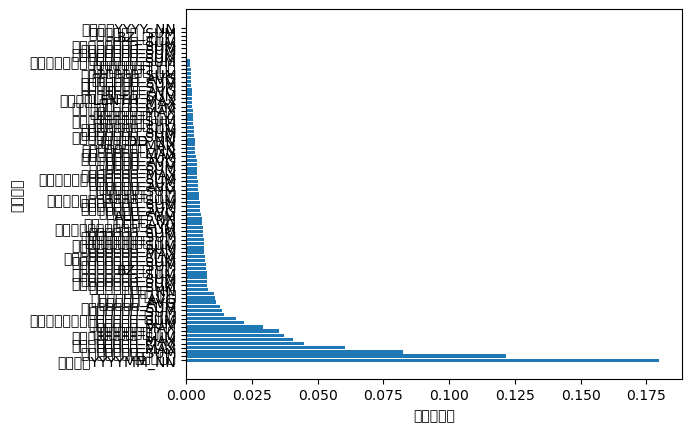

In [33]:
import matplotlib.pyplot as plt

# 获取特征重要性
feature_importances = model.feature_importances_

# 排序特征重要性
sorted_idx = np.argsort(feature_importances)[::-1]
feature_names = np.array(X_train.columns)[sorted_idx]

# 打印特征重要性排名
for i, name in enumerate(feature_names):
    print(f"排名 {i+1}: {name} ({feature_importances[sorted_idx][i]})")

# 可视化特征重要性
plt.barh(feature_names, feature_importances[sorted_idx])
plt.xlabel("特征重要性")
plt.ylabel("特征名称")
plt.show()

## 用重要特征训练新模型

In [34]:
# 获取特征重要性
feature_importances = model.feature_importances_

# 排序特征重要性
sorted_idx = np.argsort(feature_importances)[::-1]

# 取出前二十个重要特征
top_20_features = np.array(X_train.columns)[sorted_idx][:20]


['交易时间YYYYMM_NN' '就诊的月数' '非账户支付金额_SUM' '月药品金额_MAX' '医疗救助医院申请_SUM'
 '月统筹金额_MAX' '贵重药品发生金额_SUM' '一天去两家医院的天数' '月就诊次数_MAX' '其它发生金额_SUM'
 '医疗救助个人按比例负担金额_SUM' '个人编码' '个人账户金额_SUM' '贵重检查费金额_SUM' '月就诊次数_AVG'
 '月就诊医院数_AVG' '是否挂号' '顺序号_NN' '补助审批金额_SUM' '可用账户报销金额_SUM']


In [45]:
# 创建新的 DataFrame
new_df = pd.DataFrame()

# 将原始数据集中的前二十个重要特征添加到新的 DataFrame 中
for feature in top_20_features:
    new_df[feature] = df[feature]
    
    # 读取原始数据集
df_origin = pd.read_csv("E:\竞赛\服创赛-A08\data\A08.csv")

# 提取 RES 列
res = df_origin['RES']

# 将 RES 列添加到新的 df 列表中
new_df['RES'] = res


# 将新的 DataFrame 保存到 CSV 文件
new_df.to_csv('new_df.csv', index=False)

In [46]:
new_df.head()

,交易时间YYYYMM_NN,就诊的月数,非账户支付金额_SUM,月药品金额_MAX,医疗救助医院申请_SUM,月统筹金额_MAX,贵重药品发生金额_SUM,一天去两家医院的天数,月就诊次数_MAX,其它发生金额_SUM,...,个人编码,个人账户金额_SUM,贵重检查费金额_SUM,月就诊次数_AVG,月就诊医院数_AVG,是否挂号,顺序号_NN,补助审批金额_SUM,可用账户报销金额_SUM,RES
0,6,6,1742.19,3901.45,0.0,3501.18,1984.60,0,7,34.0,...,3.521200e+14,1970.99,0,5.666667,2.166667,1,69,0.0,1868.06,0
1,6,6,1172.07,2449.13,0.0,2217.66,2264.73,0,4,0.0,...,3.521200e+14,1371.57,0,2.500000,1.333333,1,64,0.0,1339.67,0
2,6,6,2403.20,3302.06,0.0,3360.55,0.00,8,9,11.2,...,3.521200e+14,2637.20,0,7.500000,2.166667,0,102,0.0,2621.28,0
3,6,6,1299.72,1500.12,0.0,3030.61,0.00,0,6,0.0,...,3.521200e+14,1373.06,0,3.833333,1.833333,0,56,0.0,1371.90,0
4,6,6,1505.65,2563.26,0.0,2332.45,2367.68,0,5,0.0,...,3.521200e+14,1569.65,0,4.333333,1.000000,0,64,0.0,1565.06,0


In [47]:
# 读取数据
df = pd.read_csv("E:\\竞赛\\服创赛-A08\\code\\model_development\\new_df.csv")
# 处理缺失值
df = df.dropna()

df.head()

,交易时间YYYYMM_NN,就诊的月数,非账户支付金额_SUM,月药品金额_MAX,医疗救助医院申请_SUM,月统筹金额_MAX,贵重药品发生金额_SUM,一天去两家医院的天数,月就诊次数_MAX,其它发生金额_SUM,...,个人编码,个人账户金额_SUM,贵重检查费金额_SUM,月就诊次数_AVG,月就诊医院数_AVG,是否挂号,顺序号_NN,补助审批金额_SUM,可用账户报销金额_SUM,RES
0,6,6,1742.19,3901.45,0.0,3501.18,1984.60,0,7,34.0,...,3.521200e+14,1970.99,0,5.666667,2.166667,1,69,0.0,1868.06,0
1,6,6,1172.07,2449.13,0.0,2217.66,2264.73,0,4,0.0,...,3.521200e+14,1371.57,0,2.500000,1.333333,1,64,0.0,1339.67,0
2,6,6,2403.20,3302.06,0.0,3360.55,0.00,8,9,11.2,...,3.521200e+14,2637.20,0,7.500000,2.166667,0,102,0.0,2621.28,0
3,6,6,1299.72,1500.12,0.0,3030.61,0.00,0,6,0.0,...,3.521200e+14,1373.06,0,3.833333,1.833333,0,56,0.0,1371.90,0
4,6,6,1505.65,2563.26,0.0,2332.45,2367.68,0,5,0.0,...,3.521200e+14,1569.65,0,4.333333,1.000000,0,64,0.0,1565.06,0


In [48]:


# 处理类别不平衡
smote = SMOTE(k_neighbors=5)
X_train, X_val, y_train, y_val = train_test_split(df.drop('RES', axis=1), df['RES'], test_size=0.25, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 初始化模型
model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_val)

# 绘制 ROC 曲线并计算 AUC 分数
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc_score = auc(fpr, tpr)

# 输出 AUC 分数和类别报告
print(f"AUC 分数: {auc_score}")
print(classification_report(y_val, y_pred))


# 获取特征重要性
feature_importances = model.feature_importances_

# 排序特征重要性
sorted_idx = np.argsort(feature_importances)[::-1]
feature_names = np.array(X_train.columns)[sorted_idx]

# 打印特征重要性排名
for i, name in enumerate(feature_names):
    print(f"排名 {i+1}: {name} ({feature_importances[sorted_idx][i]})")

AUC 分数: 0.6709925308503576
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3729
           1       0.43      0.37      0.39       183

    accuracy                           0.95      3912
   macro avg       0.70      0.67      0.68      3912
weighted avg       0.94      0.95      0.95      3912

排名 1: 就诊的月数 (0.21221472322940826)
排名 2: 交易时间YYYYMM_NN (0.19525045156478882)
排名 3: 月统筹金额_MAX (0.0681919977068901)
排名 4: 月药品金额_MAX (0.06661273539066315)
排名 5: 医疗救助医院申请_SUM (0.05971267819404602)
排名 6: 非账户支付金额_SUM (0.05599366873502731)
排名 7: 医疗救助个人按比例负担金额_SUM (0.05307379364967346)
排名 8: 一天去两家医院的天数 (0.04283342882990837)
排名 9: 贵重药品发生金额_SUM (0.036735571920871735)
排名 10: 月就诊次数_MAX (0.035842012614011765)
排名 11: 其它发生金额_SUM (0.02833297848701477)
排名 12: 个人编码 (0.02652391977608204)
排名 13: 贵重检查费金额_SUM (0.021758129820227623)
排名 14: 个人账户金额_SUM (0.017765512689948082)
排名 15: 是否挂号 (0.017746008932590485)
排名 16: 月就诊医院数_AVG (0.017399540171027184)
排名 17: 可用账户报销金